# Гамма - распределение 
Формула плотности вероятности этой случайной величины, которую я выбрал, задается следующей формулой:

$$ f(x) = \frac{x^{a-1}(e)^{-x}}{Г(a)} $$, где Г - гамма - функция от параметра a

Распределение на википедии https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5


если принять в нем тета = 1, то получится мой вариант:)

Первый шаг: задаем распределение и гистограмму по выборке из распределения объемом в 1000 значений, я взял значение параметра 1.99 из примера в документации библиотеки scipy
Параметр normed = True задавать как в условии задавать нельзя, можно поставить 
density=True, stacked=True

Text(0.5, 0, '$x$')

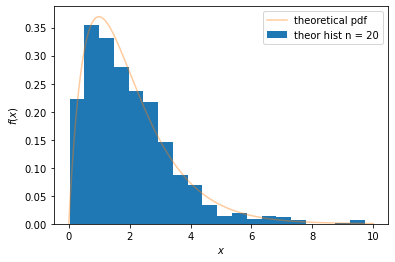

In [309]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
a = 1.99
gamma_rv = sts.gamma(a)
sample = gamma_rv.rvs(1000)
plt.hist(sample, 20, label='theor hist n = 20', density=True)
pdf = gamma_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.4)
plt.legend(loc='best')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

По справке с https://www.wolframalpha.com/input?i=gamma+distribution :
$$ mean = a $$
$$ standard deviation = sqrt(a) $$
$$ variance = a $$


In [285]:
Exv = a
std = np.sqrt(a)
Dx = std**2
print('Матожидание = ', EX, ' Стандартное отклонение =', round(std,2), ' Дисперсия = ', round(Dx,2))

Матожидание =  1.99  Стандартное отклонение = 1.41  Дисперсия =  1.99


Зададим функцию sol_gamma, которая будет возвращать для 1000 выборок объема n гистограмму распределения выборочных средних и параметры нормального распределения, которым по ЦПТ можно приблизить распределение выборочных средних

In [301]:
def sol_gamma(n):
    values = np.array([ gamma.rvs(a, size=n) for x in range(1000)])
    mv = values.mean(axis = 1)
    plt.hist(mv, density=True, stacked=True, alpha=0.5, label='hist pdf with n = ' + str(n))
    mu = Exv
    sd = np.sqrt(Dx/n)
    norm_rv = sts.norm(mu, sd)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, 'r', lw=2, alpha=0.7, label='normal distribution pdf  with n = ' + str(n))
    plt.ylabel('samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')
    print('Параметры нормального распределения:')
    print('Матожидание=' , mu)
    print('СКО =' , round(sd,4))

# Распределения при различных n

## n = 5

Параметры нормального распределения:
Матожидание= 1.99
СКО = 0.6309


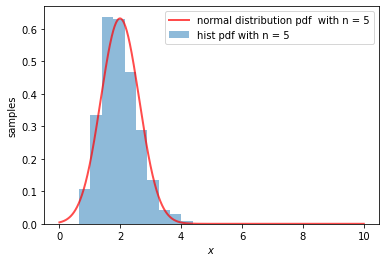

In [302]:
sol_gamma(5)

## n = 10

Параметры нормального распределения:
Матожидание= 1.99
СКО = 0.4461


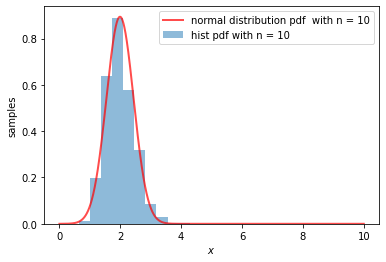

In [303]:
sol_gamma(10)

## n = 50

Параметры нормального распределения:
Матожидание= 1.99
СКО = 0.1995


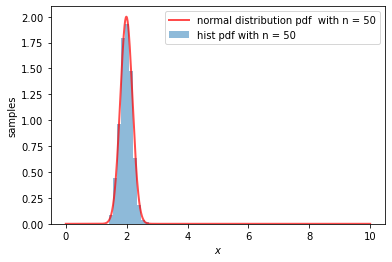

In [304]:
sol_gamma(50)

# Выводы
    

1) С ростом параметра n гистограмма становится все более гладкой, величина СКО понижается
2) Пик гистограммы становится более узким и y(пика) может превысить 1
3) С ростом n точность аппроксимации гистограммы нормальным распределением возрастает